# Clustering

### Getting Started

In [35]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt

### Import and Preprocess New Feature Engineered Dataset

In [2]:
df = pd.read_csv("../data/NewWordDifficulty.csv")
df.head()

,Word,Length,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,PoS,SentimentScore
0,a,1,16.18,798.92,-0.01,0.73,1,-0.000000,DT,0.0
1,aah,3,5.40,816.43,0.21,0.62,2,0.918296,JJ,0.0
2,aaron,5,9.29,736.06,-0.11,0.97,3,1.921928,NN,0.0
3,aback,5,5.96,796.27,0.11,0.45,2,1.921928,NN,0.0
4,abacus,6,6.24,964.40,0.65,0.47,3,2.251629,NN,0.0


In [3]:
# One hot encode PoS column
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['PoS']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['PoS']))

# Replace original PoS column
df.drop('PoS', axis=1, inplace=True)
df = pd.concat([df, encoded_df], axis=1)

In [4]:
df.set_index('Word', inplace=True)
df.head()

,Length,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,SentimentScore,PoS_CC,PoS_CD,...,PoS_VB,PoS_VBD,PoS_VBG,PoS_VBN,PoS_VBP,PoS_VBZ,PoS_WDT,PoS_WP,PoS_WP$,PoS_WRB
Word,,,,,,,,,,,,,,,,,,,,,
a,1,16.18,798.92,-0.01,0.73,1,-0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aah,3,5.40,816.43,0.21,0.62,2,0.918296,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron,5,9.29,736.06,-0.11,0.97,3,1.921928,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aback,5,5.96,796.27,0.11,0.45,2,1.921928,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abacus,6,6.24,964.40,0.65,0.47,3,2.251629,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### DR

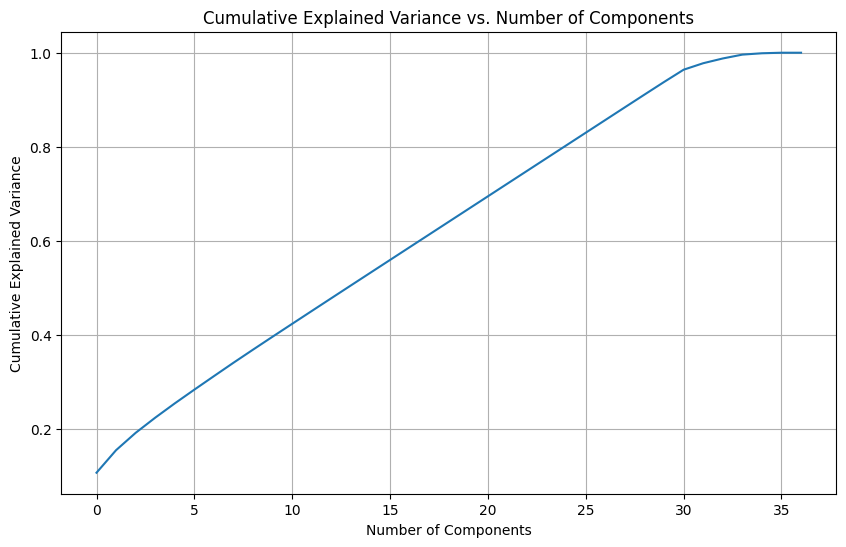

In [5]:
# Looks like ~30 components

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca.fit(scaled_features)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [6]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=30)
principal_components = pca.fit_transform(scaled_features)

comp = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 30 + 1)])

In [7]:
# Access loadings
loadings_matrix = pca.components_

# Interpret loadings
for i in range(30):
    print(f"Principal Component {i+1}:")
    component_loadings = loadings_matrix[i]
    sorted_indices = component_loadings.argsort()[::-1]
    for j in sorted_indices:
        print(f"- {df.columns[j]}: {component_loadings[j]}")
    print()

Principal Component 1:
- I_Zscore: 0.45227374808924065
- I_Mean_RT: 0.44370477553542276
- Length: 0.4029550971598077
- Vowels: 0.37098555930122146
- Entropy: 0.33818183581530664
- PoS_JJ: 0.0658692663056029
- PoS_RB: 0.028772186147237307
- PoS_VBG: 0.006736761119034736
- SentimentScore: 0.0042369275584608485
- PoS_NNP: 0.002007146735164423
- PoS_NN: 0.0008338904824458492
- PoS_VB: -0.0004679372244372603
- PoS_VBN: -0.0005300687509605167
- PoS_JJS: -0.0025786266407662687
- PoS_WP$: -0.004047666806230692
- PoS_FW: -0.004181704970762421
- PoS_WDT: -0.004237259417089091
- PoS_RP: -0.006414505732324227
- PoS_RBS: -0.00796452639065969
- PoS_RBR: -0.00847351249747823
- PoS_WP: -0.009732107197014169
- PoS_WRB: -0.010007671262123177
- PoS_TO: -0.010235173030701036
- PoS_JJR: -0.01087766597606053
- PoS_CC: -0.011500839345494824
- PoS_CD: -0.0128235925180936
- PoS_MD: -0.018524894839255648
- PoS_PRP$: -0.019212107018938943
- PoS_IN: -0.0197309952848319
- PoS_PRP: -0.02233182008246511
- PoS_DT: -0

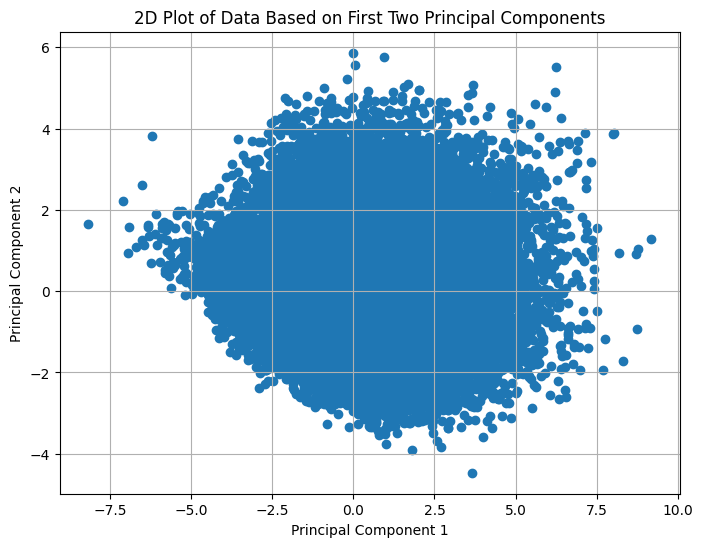

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(comp['PC1'], comp['PC2'])
plt.title('2D Plot of Data Based on First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### Regression

We will be using regression to observe for reduction or growth in the correlation metric `r^2` in a one vs. one manner. This will be down by comparing the `r^2` without dropping any features with a the `r^2` after droping a specific feature. Any slight difference, say 10% based on the 10% Confounding Rule, would mean that this specific feature that was dropped has a significant impact on the word difficulty. Analagous to feature permutation

In [25]:
regression_df = df.drop('I_Zscore', axis=1)

regression = LinearRegression()
regression.fit(regression_df, df['I_Zscore'])

benchmark_r = regression.score(regression_df, df['I_Zscore'])
print(f"Benchmark R^2 value: {benchmark_r}")

Benchmark R^2 value: 0.9292678916446148


In [28]:
# 10% confounding rule
for dropped_feature in regression_df.columns:
    temp_df = regression_df.drop(dropped_feature, axis=1)
    
    conf_regression = LinearRegression()
    conf_regression.fit(temp_df, df['I_Zscore'])
    new_r = conf_regression.score(temp_df, df['I_Zscore'])
    
    if not(benchmark_r * 0.9 < new_r < benchmark_r * 1.1):
        print(dropped_feature)

I_Mean_RT


In [33]:
# Do the same with sklearn's feature pemtuation
perm_importance = permutation_importance(regression, regression_df, df['I_Zscore'], n_repeats=10)

# Get feature importance scores
importance_scores = perm_importance.importances_mean

# Sort feature importance scores and corresponding feature names
sorted_indices = importance_scores.argsort()[::-1]
sorted_feature_names = regression_df.columns[sorted_indices]
sorted_scores = importance_scores[sorted_indices]

# Print feature importance scores
for name, score in zip(sorted_feature_names, sorted_scores):
    print(f"{name}: {score}")

I_Mean_RT: 1.1094362201703658
I_Mean_Accuracy: 0.06399082049973662
Length: 0.02644976178693651
Log_Freq_HAL: 0.009105884760583804
Vowels: 0.0021464861929257895
Entropy: 0.0015707412372580997
PoS_NNS: 0.0003679138523787873
PoS_VBG: 0.0002034597879561173
PoS_VBD: 0.00018216334763466736
PoS_NN: 0.00013494068761481514
PoS_VBN: 0.00010441920396070392
PoS_VBP: 5.41726011896837e-05
SentimentScore: 3.382158451573636e-05
PoS_JJS: 2.920297814622552e-05
PoS_VBZ: 2.4639558780958914e-05
PoS_VB: 1.9225456183336043e-05
PoS_JJR: 1.5646464583396468e-05
PoS_PRP: 1.1064780793945684e-05
PoS_RB: 8.659699896229612e-06
PoS_CC: 8.536991422181118e-06
PoS_FW: 5.559220014283994e-06
PoS_WRB: 4.07636053735283e-06
PoS_PRP$: 2.869935334437468e-06
PoS_RBR: 2.3455113396630976e-06
PoS_TO: 1.7924921375755965e-06
PoS_JJ: 1.5787310222337147e-06
PoS_DT: 1.2702543938813981e-06
PoS_RBS: 7.420248661849093e-07
PoS_WDT: 3.509047524330455e-07
PoS_NNP: 3.3727148670559257e-07
PoS_IN: 1.2259727717456314e-07
PoS_WP: 8.69760850896739

Looks like I_Mean_RT is a really important feature for determining difficulty. In fact, anything else is very miniscule. 

### Hierarchial Clustering

In [ ]:
linkage(df, method='ward')